# 2.4 Data Cleaning and Analysis

根据福布斯的统计，数据科学家60%的工作时间都是在清洗、整理数据。

在本章节，我们将会学到以下知识点：

- Data aggregation
- How to combine data
- How to transform data
- How to clean strings with pandas
- How to handle missing and duplicate data

在本章节，我们将使用 **World Happiness Report** 数据, 一个 UN Sustainable Development Solutions Network 发布的年度报告 with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.

Throughout this course, we'll work to answer the following questions:

- How can aggregating the data give us more insight into happiness scores?
- How did world happiness change from 2015 to 2017?
- Which factors contribute the most to the happiness score?

# 2.4.1 Data Aggregation

在此任务中，我们将从学习如何汇总数据开始。然后，在下一个任务中，我们将学习不同的数据清除技能，这些技能可以帮助我们以不同的方式汇总和分析数据。我们将从孤立地学习每个主题开始，但是到课程结束时，将朝着更完整的数据清理工作流发展。

- ### 数据介绍

The data set is a CSV file called `World_Happiness_2015.csv`. Below are descriptions for some of the columns we'll be working with:

- `Country` - Name of the country.
- `Region` - Name of the region the country belongs to.
- `Happiness` Rank - The rank of the country, as determined by its happiness score.
- `Happiness` Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- `Family` - The estimated extent to which family contributes to the happiness score.
- `Freedom` - The estimated extent to which freedom contributes to the happiness score.
- `Generosity` - The estimated extent to which generosity contributes to the happiness score.

In [1]:
import pandas as pd
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
happiness2015[:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [2]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


- ### 利用循环进行分类汇总数据

步骤：
- Identify each unique group in the data set.
- For each group:
 + Select only the rows corresponding to that group.
 + Calculate the average for those rows.

In [3]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    region_group = happiness2015[happiness2015['Region']==r]
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[r] = region_mean

mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.144681818181818,
 'Southeastern Asia': 5.317444444444445,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.202800000000001,
 'Southern Asia': 4.580857142857143}

- ### The GroupBy Operation

以上的代码执行了三个步骤，split, apply, combine:

![split_apply_combine](split_apply_combine.svg)

像其他的常见操作任务， pandas 内置的 [groupy operation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) 可以执行该任务。 

`groupby` operation 在dataframe上执行 "split-apply-combine" 过程，并将其浓缩为两步：
1. 创建一个 GroupBy 对象.
2. 在该 GroupBy 对象上运行函数.

![Groupby_Full](Groupby_Full.svg)

创建的Groupby对象可以理解为一个 mapping document, 上面记录了**分类的方式**各个**数据在df中的位置**

- ### 创建Groupby对象

创建GroupBy对象需要[DataFrame.groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html):   

`df.groupby('col')`   

where col is the column you want to use to group the data set. Note that you can also group the data set on multiple columns by passing a list into the `DataFrame.groupby()` method. 


In [4]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

Since there's a small number of groups and each group contains more than one unique value, we can confirm the Region column is a good candidate to group by.

[GroupBy.get_group()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) 方法可以从Groupby对象中选取特定的group

In [5]:
grouped = happiness2015.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')

In [6]:
grouped

In [7]:
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


- ### 探索Groupby对象

我们还可以用 [GroupBy.groups](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.groups.html) 特征查看更多Groupby对象信息：

In [8]:
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

这就像是所谓的 mapping document

Int64Index里的value就是原始df中各个`Region`对应的行索引

验证
`'North America': Int64Index([4, 14], dtype='int64')`：

In [9]:
grouped = happiness2015.groupby('Region')
north_america = happiness2015.loc[[4,14],]
na_group = grouped.get_group('North America')
equal = north_america == na_group
equal

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,True,True,True,True,True,True,True,True,True,True,True,True
14,True,True,True,True,True,True,True,True,True,True,True,True


- ### Common Aggregation Methods with Groupby

In [10]:
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

返回的是一个series，和`happiness2015['Region'].value_counts()`一样

|**Methods** 	|    **Description**|
|---------------|-------------------|
|**mean()**|	Calculates the mean of groups.|
|**sum()**|Calculates the sum of group values.|
|**size()**|	Calculates the size of the groups.|
|**count()**|	Calculates the count of values in groups.|
|**min()**	|Calculates the minimum of group values.|
|**max()**|	Calculates the maximum of group values.|

In [11]:
means = grouped.mean()
means

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


- ### Aggregating Specific Columns with Groupby

Groupby 对象支持列索引：

In [12]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

- ### Agg() Method 介绍

如果我们想要对同时对同一行 apply more than one kind of aggregation，应该怎么办?

例如，假设我们要计算每个region的*平均*幸福分数和*最大*幸福分数。使用到目前为止所学的知识，我们必须先像上面一样计算*平均值*，然后再单独计算*最大值*。

幸运的是，[GroupBy.agg()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)方法可以一次执行两种聚合。我们可以使用以下语法：

![Agg_Syntax](Agg_Syntax.svg)

In [13]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']

happy_mean_max = happy_grouped.agg([np.mean, np.max])
happy_mean_max

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


Our result is a dataframe containing both the mean and maximum happiness scores for each region. Note that the columns are named for the functions themselves. Because `np.max` is an alias for `np.amax`, the column for the maximum is named `amax`.

In [14]:
def dif(group):
    return (group.max() - group.mean())

dif(happy_grouped)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

In [15]:
happy_grouped.agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

以上我们了解到了我们可以用`Agg()`:
- 一次性实行多个 aggregation.
- 计算自定义的 aggregations.

也可以写在同一行，但影响阅读

In [16]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
happiness_means

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [17]:
type(happiness_means)

pandas.core.series.Series

- ### Aggregation with Pivot Tables

print `happiness_mean` 可以看到`Region`列中的值是生成系列的`index`，而`Hapiness Score`列包含被聚合的值：

![PV_Syntax](PV_Syntax.svg)

`index`和`values`实际上是用于聚合数据的另一种方法[DataFrame.pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html)方法中的参数。这种`df.pivot_table()`方法可以执行与 `df.groupby` 方法相同的聚合，使复杂聚合的代码更容易阅读

In [18]:
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [19]:
type(happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean))

pandas.core.frame.DataFrame

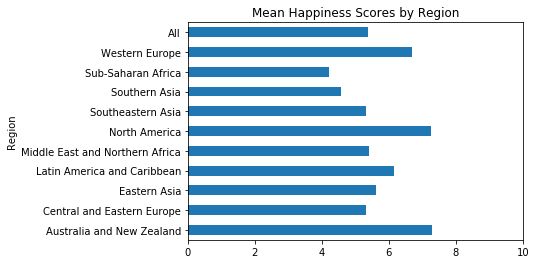

In [113]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)

pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean Happiness Scores by Region', legend=False)

- ### Aggregating Multiple Columns and Functions with Pivot Tables

当我们将`margins`参数设置为`True`时，`All`将添加到结果dateframe的索引中，并且相应的值将是对整个列应用聚合方法的结果。 在我们的示例中，`All`是`Happiness Score`列的平均值。

`pivot_table`方法还允许我们一次性聚合多个列并应用多个函数。

下面，我们汇总了`happiness2015`中的`Happiness Score`和`Family`列，并按`Region`列进行分组：

In [21]:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


多个函数：

In [22]:
happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


### Exercise

比较一下`groupby`操作和`pivot_table()`方法返回的结果:

In [23]:
grouped = happiness2015.groupby('Region')[['Happiness Score', 'Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])

pv_happy_family_stats = happiness2015.pivot_table(values=['Happiness Score', 'Family'], 
                                                  index='Region', aggfunc=[np.min, np.max, np.mean], margins=True)

In [24]:
happy_family_stats

Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                    amax      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

In [25]:
pv_happy_family_stats

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734

# 2.4.2 Combining Data with Pandas

以上只同时处理一个数据集，但是在实际中经常同时处理多个，本任务将学习如何用pandas合并数据

我们将使用在上一个任务中获得的知识来分析2015年，2016年和2017年的 World Happiness Reports. 具体来说，我们将寻求回答以下问题：

*从2015年到2017年，世界幸福感是增加，减少还是保持不变？*

In [26]:
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

- ### Combining Dataframes with the Concat Function

使用[pd.concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)合并数据，有两种方式：

1. 竖着合并，`Axis` = `0` (默认）:
![Concat_Updated](Concat_Updated.svg)

2. 横着并排合并， `Axis` = `1`:
![Concat_Axis1](Concat_Axis1.svg)

In [27]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0 = pd.concat([head_2015, head_2016])
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)

concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [28]:
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


以上合并的数据有相同shape和index

当数据的shape和index不同时：

In [29]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [30]:
concat_axis0

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
0,Denmark,7.526,NaN,2016
1,Switzerland,7.509,NaN,2016
2,Iceland,7.501,NaN,2016


In [31]:
concat_axis1

,Year,Country,Happiness Score,Standard Error,Country,Happiness Score,Year
0,2015,Switzerland,7.587,0.03411,Denmark,7.526,2016.0
1,2015,Iceland,7.561,0.04884,Switzerland,7.509,2016.0
2,2015,Denmark,7.527,0.03328,Iceland,7.501,2016.0
3,2015,Norway,7.522,0.03880,NaN,NaN,NaN


再次注意原始dataframes的 indexes 没有改变. 如果 indexes 没有特别意义，最好重新设置它们.

使用`ignore_index`参数重设index

In [32]:
concat_update_index = pd.concat([head_2015,head_2016], ignore_index=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [33]:
concat_update_index

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
4,Denmark,7.526,NaN,2016
5,Switzerland,7.509,NaN,2016
6,Iceland,7.501,NaN,2016


- ### Joining Dataframes with the Merge Function

`pd.concat()`是“粗暴地”把两个或多个表合并在一起，若想要像在数据库中一样**连接**两个数据集，需要用到[pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html)函数

`pd.merge()`**只能水平**地合并数据（axis=`1`）

`pd.merge()`一次只能合并两个数据集，它合并两个数据集 on a **key**（一个列，类似主键）

key是两个数据集之间的联系，既可以是common values，也可以是index。以下用`Country`列的common values连接两个数据集：

![Merge_link](Merge_link.svg)

![Merge](Merge.svg)

其语法如下：

![Merge_syntax](Merge_syntax.svg)

In [34]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left=three_2015, right=three_2016, on='Country')
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


以上只返回了key的**交集**，这种连接/组合方法被称为 ***inner* join** (内连接)

和SQL中的概念一样，有四种连接方式：

1. **Inner**: only includes elements that appear in both dataframes with a common key
2. **Outer**: includes all data from both dataframes
3. **Left**: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
4. **Right**: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes

`pd.concat()`实现的连接就是outer join

使用参数`how`设置连接的形式：

In [35]:
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how='left')

merged_left_updated = pd.merge(left=three_2016, right=three_2015, on='Country', how='left')

都使用左连接，调换左右数据集，对比：

In [36]:
merged_left

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [37]:
merged_left_updated

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


A left join includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key.

In summary, we'd use a left join when we don't want to drop any data from the left dataframe.


此外，`merge()` 函数还为列添加了 suffixes（后缀）`_x`, `_y`以便区分，

若想自定义后缀，可使用`suffixes`参数，其接受一个长度为2的list-like值，按顺序给left和right添加后缀，默认为`_x`, `_y`：

In [38]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
            
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', 
                           on='Country', suffixes=('_2015','_2016'))

merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how='left', 
                                   on='Country', suffixes=['_2016','_2015'])                         

In [39]:
merged_suffixes

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [40]:
merged_updated_suffixes

,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


- ### Join on Index with the Merge Function

除了用common value连接数据，我们还可以用**index**连接

用**index**连接, 需要设置 `left_index` 和 `right_index` 参数为 `True`:

In [41]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,right = three_2016, 
                       left_index = True, right_index = True, suffixes = ('_2015','_2016'))

merge_index_left = pd.merge(left=four_2015, right=three_2016, how='left', 
                            left_index=True, right_index=True, suffixes=('_2015','_2016'))

In [42]:
merge_index

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [43]:
merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


When we join on index, however, our result will contain only common *indexes*.

### 总结：
![concat&merge](concat&merge.png)

**Did world happiness increase, decrease, or stay about the same from 2015 to 2017?**

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


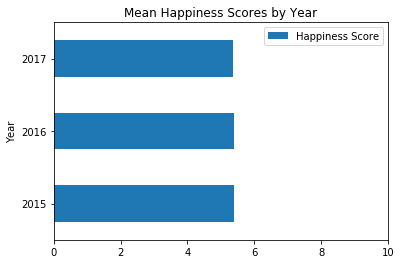

In [44]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

combined = pd.concat([happiness2015,happiness2016,happiness2017])

pivot_table_combined = combined.pivot_table(values='Happiness Score', index='Year', aggfunc='mean')

pivot_table_combined.plot(kind='barh',title='Mean Happiness Scores by Year', xlim=(0,10))

# 2.4.3 Transforming Data with Pandas

World Happiness Report 中有一些列表示某因素对幸福感评分的估计程度：
- `Economy (GDP per capita)`
- `Family`
- `Health (Life Expectancy)`
- `Freedom`
- `Trust (Government Corruption)`
- `Generosity`

在本任务中，我们将把这些列看做 "Factor"（影响因素）列，我们将尝试回答以下问题：

Which of the factors above contribute the most to the happiness score?

但是，为了回答此问题，我们需要将我们的数据操作成一种更易于分析的格式。我们将探索以下功能和方法来执行此任务：
- `Series.map()`
- `Series.apply()`
- `DataFrame.applymap()`
- `DataFrame.apply()`
- `pd.melt()`

In [45]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


注意有些列名过长，使用`DataFrame.rename()`把这些名字改掉：

In [46]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }

happiness2015.rename(mapping, axis=1, inplace=True)

In [47]:
happiness2015[['Country','Happiness Score','Economy','Family','Health','Freedom','Trust','Generosity']].head()

,Country,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


回想一下，每个数字代表每个因素对幸福感评分的贡献程度。

但是，这个定义不仅难以理解，而且跨多个列分析所有这些数字也可能具有挑战性。 相反，我们可以首先使用以下函数将这些数字转换为类别型数据，以表明该因素对幸福感评分有高影响还是低影响

 - ### Apply a Function Element-wise Using the Map and Apply Methods

In [48]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

尽管pandas提供了许多内置函数来执行常见的数据清理任务，但在这种情况下，我们需要执行的转换对我们的数据非常有针对性，以至于不存在这种内置函数。 幸运的是，pandas有两种方法可用于将自定义函数（如上面定义的一种）应用于我们的数据，从以下两种方法开始：
1. [Series.map()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) method
用于将系列中的每个值替换为另一个值，该值可以从函数，字典或Series中得出。
2. [Series.apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) method 用于在Series值上调用函数

以上两种方法 apply a function *element-wise* to a column. 

element-wise指的是我们一次向函数传递Series中的一个值，它执行某种转换。
![Map_generic](Map_generic.svg)


语法如下：

![Map_Apply_Syntax](Map_Apply_Syntax.svg)

In [49]:
economy_impact_map = happiness2015['Economy'].map(label)

economy_impact_apply = happiness2015['Economy'].apply(label)

economy_impact_map.equals(economy_impact_apply)

True

In [50]:
economy_impact_map

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [51]:
economy_impact_apply

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

上面，我们使用`Series.map()`和`Series.apply()`方法将一个函数应用于`Economy`列，并确认这两种方法均**产生相同的结果**。

请注意，这两个方法**不会更改原始Series**。 如果要在原始Dataframe中使用新Series，则必须将结果分配回原始列或创建一个新列。

建议创建一个新列，以防需要引用原始值：

In [52]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
happiness2015['Economy Impact'] = happiness2015['Economy'].map(label)
happiness2015[['Economy','Economy Impact']][:5]

,Economy,Economy Impact
0,1.39651,High
1,1.30232,High
2,1.32548,High
3,1.45900,High
4,1.32629,High


**`map()`和`apply()`的区别：**

我们给`label()`函数设置一个新的参数：

In [53]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'

此时使用`map()`方法就会报错

In [54]:
economy_map = happiness2015['Economy'].map(label, x = .8)

TypeError: map() got an unexpected keyword argument 'x'

`apply()`可以执行有多个参数的方法：

In [55]:
economy_impact_apply = happiness2015['Economy'].apply(label, x=0.8)

注意：`apply()`和`map()`都是element-wise的，这意味着传递进去的方法都是一个元素一个元素的计算。

recall pandas具有向量计算的特性，即多行或多列一起计算，这意味着使用`apply()`和`map()`的速度要比向量计算慢

- ### Apply a Function Element-wise to Multiple Columns Using Applymap Method

`Series.map()`和`Series.apply()`一次只能应用于一列，转换多列需要写多行：
```
happiness2015['Economy Impact'] = happiness2015['Economy'].apply(label)
happiness2015['Health Impact'] = happiness2015['Health'].apply(label)
happiness2015['Family Impact'] = happiness2015['Family'].apply(label)
```
想要同时转换多列，需要用到[DataFrame.applymap()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html)方法
![Applymap_syntax](Applymap_syntax.svg)

In [56]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

factors_impact = happiness2015[factors].applymap(label)
factors_impact[:5]

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


- ### Apply Functions along an Axis using the Apply Method

`apply()`方法同样也可以用于DataFrame，但是[DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

与Series的不同，`df.apply()`沿着轴应用函数，因此只能应用 *column-wise* 或 *row-wise* 的函数：

使用`df.apply()`计算每一列'High'和'Low'的数量：

In [57]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


当我们将`pd.value_counts`函数应用于`factors_impact`时，它首先计算了第一列`Economy`的频数，再计算第二列`Family`的频数，依此类推：

![Apply_counts](Apply_counts.svg)

注意，我们之所以可以用`df.apply()`方法来转换多列，是因为pd.value_counts函数对Series进行操作。 如果我们尝试使用`df.apply()`方法将执行一个"element-wise"的函数，则会收到错误消息：

`happiness2015[factors].apply(label)`

`ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index Economy')`

In [58]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


`Serise.size` 属性返回Series中的元素个数

数据集中的6个factors再加上`Dystopia Residual`列的和，就是`Happiness Score`


In [115]:
#Calculate the sum of the factor columns in each row.
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust',
                                              'Generosity', 'Dystopia Residual']].sum(axis=1)

#Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()

,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


因此我们可以计算各个factor的占幸福感分数的比例来评估哪个factor的贡献最大

In [60]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col/happiness2015['Happiness Score']# 通过数据框的index连接对应
    return div * 100

factor_percentages = happiness2015[factors].apply(percentages)

`DataFrame.apply`*(func, axis=0, raw=False, result_type=None, args=(), kwds)*
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is either the DataFrame’s index (`axis=0`) or the DataFrame’s columns (`axis=1`). By default (`result_type=None`), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

In [61]:
factor_percentages.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


- ### Reshaping Data with the Melt Function

我们可以通过 添加一列描述factor的变量 把以上多个列的values放在一列中，比如：

从：

In [62]:
happy_two = happiness2015[['Country','Economy', 'Family', 'Health']][:2]
happy_two

,Country,Economy,Family,Health
0,Switzerland,1.39651,1.34951,0.94143
1,Iceland,1.30232,1.40223,0.94784


到：

In [63]:
pd.melt(happy_two, id_vars=['Country'], value_vars=['Economy', 'Family', 'Health'])

,Country,variable,value
0,Switzerland,Economy,1.39651
1,Iceland,Economy,1.30232
2,Switzerland,Family,1.34951
3,Iceland,Family,1.40223
4,Switzerland,Health,0.94143
5,Iceland,Health,0.94784


![Melt_Syntax](Melt_Syntax.svg)

In [64]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)
melt['Percentage'] = round((melt['value'] / melt['Happiness Score']) * 100, 2)

In [65]:
melt[:5]

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


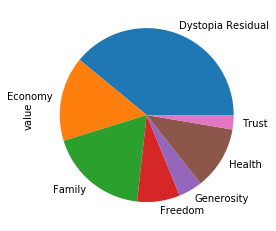

In [66]:
pv_melt = melt.pivot_table(index='variable', values='value', aggfunc='mean')
pv_melt.plot(kind='pie', y='value', legend=False)

**总结**:

|Method | Series or Dataframe Method | Applies Functions Element-wise?|
|-------|----------------------------|--------------------------------|
|`Map`|	Series|	Yes|
|`Apply`|	Series	|Yes|
|`Applymap`	|Dataframe	|Yes|
|`Apply`|	Dataframe	|No, applies functions along an axis|

此外，还有一种 "un-melt" 的方法，即把列的信息转化到行（与`melt`相反），该方法为[df.pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)（并非数据透视表的`df.pivot_table`）

In [67]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [68]:
df.pivot(index='foo', columns='bar')

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [69]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [70]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [71]:
df.pivot(index='foo', columns='bar')['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


# 2.4.4 Working With Strings In Pandas

### 复习：

In [72]:
laptops = pd.read_csv('laptops.csv', encoding='Latin-1')
def clean_col(col):
    col = col.strip()  # 移除string前后的空格
    col = col.replace('Operating System','os')  # 替换
    col = col.replace('(','')
    col = col.replace(')','')
    col = col.replace(' ','_')
    col = col.lower() # 小写
    return col

new_columns = []
for c in laptops.columns:  # df.columns 指向列名
    clean_c = clean_col(c)
    new_columns.append(clean_c)
    
laptops.columns = new_columns # 可以通过直接更改df.columns更改列名

In [73]:
laptops['ram'] = laptops['ram'].str.replace('GB','') # 在 Series.str 后可以调用类似于 string 里的方法
unique_ram = laptops['ram'].unique()
laptops['ram'] = laptops['ram'].astype(int) # 更改 Series 的数据类型 dtype

In [74]:
print(laptops["gpu"].head())

0    Intel Iris Plus Graphics 640
1          Intel HD Graphics 6000
2           Intel HD Graphics 620
3              AMD Radeon Pro 455
4    Intel Iris Plus Graphics 650
Name: gpu, dtype: object


In [75]:
laptops["gpu"].str.split()  # split()方法将 string 分割，储存在数组里

0       [Intel, Iris, Plus, Graphics, 640]
1              [Intel, HD, Graphics, 6000]
2               [Intel, HD, Graphics, 620]
3                  [AMD, Radeon, Pro, 455]
4       [Intel, Iris, Plus, Graphics, 650]
                       ...                
1298            [Intel, HD, Graphics, 520]
1299            [Intel, HD, Graphics, 520]
1300                 [Intel, HD, Graphics]
1301               [AMD, Radeon, R5, M330]
1302                 [Intel, HD, Graphics]
Name: gpu, Length: 1303, dtype: object

In [76]:
laptops['cpu_manufacturer'] = laptops['cpu'].str.split().str[0] # 仅取数组中的第一个元素
laptops['cpu_manufacturer'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: cpu_manufacturer, dtype: int64

In [77]:
laptops['cpu_manufacturer']

0       Intel
1       Intel
2       Intel
3       Intel
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301    Intel
1302    Intel
Name: cpu_manufacturer, Length: 1303, dtype: object

`Series.map()`传递字典时：

In [78]:
mapping_dict = {
    'Android': 'Android',
    'Chrome OS': 'Chrome OS',
    'Linux': 'Linux',
    'Mac OS': 'macOS',
    'No OS': 'No OS',
    'Windows': 'Windows',
    'macOS': 'macOS'
}

laptops['os'] = laptops['os'].map(mapping_dict)  # 按照key替换value

In [79]:
bad = ['k', 'g', 's']  # 用循环替换数据中的字符
for word in bad:
    laptops['weight'] = laptops['weight'].str.replace(word,'')
    
laptops.rename({'weight':'weight_kg'}, inplace = True, axis = 1)
laptops['weight_kg'] = laptops['weight_kg'].astype(float)

以上可以看出，所有的方法都是基于Series的，所以无论是`Series.str.strip` 还是 `Series.map()`, 都是对整列的所有元素执行操作

- ### Introduction

In this mission, we'll learn a couple other string cleaning tasks such as:

- Finding specific strings or substrings in columns
- Extracting substrings from unstructured data
- Removing strings or substrings from a series

We'll work with the 2015 **World Happiness Report** again and additional economic data from the **World Bank**. 

In [80]:
world_dev = pd.read_csv("World_dev.csv")
world_dev[:5]

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


Below are descriptions for the columns we'll be working with:

- `ShortName` - Name of the country
- `Region` - The region the country belongs to
- `IncomeGroup` - The income group the country belongs to, based on Gross National Income (GNI) per capita
- `CurrencyUnit` - Name of country's currency
- `SourceOfMostRecentIncomeAndExpenditureData` - The name of the survey used to collect the income and expenditure data
- `SpecialNotes` - Contains any miscellaneous notes about the data

当key的名字不同时，`pd.merge()`的语法：

`pd.merge(left=df1, right=df2, how='left', left_on='left_df_Column_Name', right_on='right_df_Column_Name')`

In [81]:
merged = pd.merge(left=happiness2015, right=world_dev, left_on='Country',
                  right_on='ShortName', how='left')

col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged.rename(col_renaming, axis=1, inplace=True)

- ### Using Apply to Transform Strings

Let's work with the `CurrencyUnit` column first. Suppose we wanted to extract the unit of currency without the leading nationality. For example, instead of "Danish krone" or "Norwegian krone", we just needed "krone".

用`string.split()`实现

In [82]:
words = 'Danish krone'

#Use the string.split() method to return the following list: ['Danish', 'krone']
listwords = words.split()

#Use the index -1 to return the last word of the list.
listwords[-1]

'krone'

In [83]:
merged['CurrencyUnit'].str.split().str[-1]

0       franc
1       krona
2       krone
3       krone
4      dollar
        ...  
153     franc
154     franc
155       NaN
156     franc
157     franc
Name: CurrencyUnit, Length: 158, dtype: object

In [84]:
def extract_last_word(element):
    element = str(element)
    return element.split()[-1]

merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

In [85]:
# 等价于 
merged['CurrencyUnit'].str.split().str[-1].head() # 向量计算
# 不过空值一个显示为NaN，一个为nan，所以两个不完全相等

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: CurrencyUnit, dtype: object

注意：`apply()`和`map()`都是element-wise的，这意味着传递进去的方法都是一个元素一个元素的计算。

recall pandas具有向量化运行的特性，即多行或多列一起计算，这意味着使用`apply()`和`map()`的速度要比向量计算慢

![Split](Split.png)

- ### Vectorized String Methods Overview

`str`属性指示应该将Series中的每个对象都视为一个字符串，而不必像使用`apply`方法那样将类型显式更改为字符串。

其他的一些string向量化运行方法：

|Method	|Description|
|-------|-----------|
|Series.str.split()|	Splits each element in the Series.|
|Series.str.strip()|	Strips whitespace from each string in the Series.|
|Series.str.lower()|	Converts strings in the Series to lowercase.|
|Series.str.upper()|	Converts strings in the Series to uppercase.|
|Series.str.get()|	Retrieves the ith element of each element in the Series.|
|Series.str.replace()|	Replaces a regex or string in the Series with another string.|
|Series.str.cat()|	Concatenates strings in a Series.|
|Series.str.extract()|	Extracts substrings from the Series matching a regex pattern.|

Note that we can also slice each element in the Series to extract characters, but we'd still need to use the `str` attribute. For example, below we access the first 5 characters in each element of the `CurrencyUnit` column:

In [86]:
merged['CurrencyUnit'].str[0:5][:3]

0    Swiss
1    Icela
2    Danis
Name: CurrencyUnit, dtype: object

In [87]:
'CurrencyUnit'[:5]

'Curre'

String 方法可连在一起写：

In [88]:
merged['CurrencyUnit'].str.upper().str.split()[:3]

0      [SWISS, FRANC]
1    [ICELAND, KRONA]
2     [DANISH, KRONE]
Name: CurrencyUnit, dtype: object

In [89]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)

merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

- ### Exploring Missing Values with Vectorized String Methods

In [90]:
merged['CurrencyUnit'].isnull().sum()

13

So, we know that the `CurrencyUnit` column has 13 missing values.

In [118]:
lengths = merged['CurrencyUnit'].str.len()
lengths.value_counts(dropna=False)

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

value_counts contains `NaN`s, it means`Series.str.len()` method excluded `NaN`s and didn't treat them as strings.

- ### Finding Specific Words in Strings

以上, we identified 3 benefits of using vectorized string methods:

- Better performance
- Code that is easier to read and write
- Automatically excludes missing values

In [92]:
merged['SpecialNotes'][:5]

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Fiscal year end: March 31; reporting period fo...
Name: SpecialNotes, dtype: object

假设我们需要解析一个Series的元素，以查找某一特定的substring，该substring在每个string中的位置不一样。 例如，`SpecialNotes`列中 许多行提到 “national accounts” ，但这些词出现在每个string的不同地方：

```April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the **base year** changed to 2002.
Based on IMF data, national accounts data have been revised for 2005 onward; the new base year is 2005.```

假如想要知道有多少行出现了"national accounts",就涉及到了正则表达式的概念（**regular expressions**, or **regex**）

正则表达式是描述搜索模式的字符序列，用于匹配字符串中的字符：

![Regular_Expressions](Regular_Expressions.png)

[Series.str.contains()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html): 检测pattern或regex是否包含在Series或Index的字符串中，返回boolean Series或Index。

In [93]:
pattern = r"[Nn]ational accounts"

national_accounts = merged['SpecialNotes'].str.contains(pattern)
national_accounts.head()

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object

中括号`[]` indicate that either **"national accounts"** or **"National accounts"** should produce a match.

In [94]:
national_accounts.value_counts(dropna=False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

使用 boolean indexing 的方法选取所有`SpecialNotes`列含有"national accounts" 或 "National accounts" 的数据

In [95]:
merged[national_accounts]

ValueError: cannot index with vector containing NA / NaN values

报错的原因是`national_accounts`里有空值，

解决该问题的一个方法是吧空值转换为`False`
![Missing_values](Missing_values.svg)

In [96]:
national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)
merged_national_accounts = merged[national_accounts]
merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


- ### Extracting Substrings from a Series

假设我们要提取`SpecialNotes`列中的年份。应注意，年份中的字符遵循特定的pattern：
![Years](Years.png)

第一个数字为 `1` 或 `2`, 后三个为 `0` 到 `9`.

对于正则表达式，我们可以用以下语法表示数字范围：

In [97]:
pattern = r"[0-9]"

表示字母范围：

In [98]:
#lowercase letters
pattern1 = r"[a-z]"

#uppercase letters
pattern2 = r"[A-Z]"

我们还可以使这些范围更具限制性。 例如，如果我们想在一列中找到一个三个字符的子字符串，该子字符串以1到6之间的数字开头，并以任何形式的两个字母结尾，则可以使用以下语法：

In [99]:
pattern = r"[1-6][a-z][a-z]"

如果我们有一个重复的pattern，我们也可以使用大括号{ }表示重复的次数：

`pattern = r"[1-6][a-z][a-z]" = r"[1-6][a-z]{2}"`

使用 [Series.str.extract()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html) 方法提取`SpecialNotes`列中的年份

In [100]:
pattern =r"([1-2][0-9]{3})"  #之所以这里带 "()" 是 extract 方法的要求

years = merged['SpecialNotes'].str.extract(pattern)

In [101]:
years[0].value_counts(dropna=False)

NaN     77
2010    14
1999    13
2013     8
2009     6
2006     5
2005     5
2011     4
2007     4
2012     3
2000     3
2008     3
1990     2
2014     2
2004     2
2001     2
1997     1
2015     1
1965     1
1993     1
1960     1
Name: 0, dtype: int64

当使用`Series.str.extract()`方法时，我们将正则表达式括在小括号中。括号表示只有和pattern匹配的字符才应被提取并和返回到Series。我们称其为**Capturing Group**。

捕获组就是把正则表达式中子表达式匹配的内容，保存到内存中以*数字编号*或*显式命名*的组里，方便后面引用。

![Parantheses](Parantheses.png)
如果capturing group在某一行里不存在，则返回NaN

`extract()`默认`expand`为`True`，返回DataFrame，

把参数`expand`设置为`False`可以返回Series

In [102]:
merged['SpecialNotes'].str.extract(pattern, expand=False)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
153    2006
154     NaN
155     NaN
156     NaN
157    2013
Name: SpecialNotes, Length: 158, dtype: object

- ###  Extracting All Matches of a Pattern from a Series

`Series.str.extract()` 只会提取pattern的第一个匹配项，想要提取所有匹配项需要用到[Series.str.extractall()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extractall.html)方法。

我们将演示此方法，但首先，通过使用[df.set_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html)方法将`Country`列设置为索引，使结果更易于阅读。

In [103]:
merged = merged.set_index('Country')

In [104]:
merged.head(3)

,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
Country,,,,,,,,,,,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc,franc
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona,krona
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0,krone,krone


我们可以给捕获组命名: `(?P<Column_Name>...)`

以下，给捕获组命名为`Years`

In [105]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
merged['SpecialNotes'].str.extractall(pattern)

Years
Country     match      
Finland     0      1999
            1      1999
Netherlands 0      1999
            1      2037
            2      1999
...                 ...
Rwanda      1      2011
            2      2008
Togo        0      2013
            1      2000
            2      2000

[164 rows x 1 columns]

![Extractall](Extractall.png)

Let's look at the `IESurvey` column next. This column has years in two different formats:

```Integrated household survey (IHS), 2012
Integrated household survey (IHS), 2010/11```

In [106]:
years = merged['IESurvey'].str.extractall(pattern)
years['Years'].value_counts()

2012    33
2010    28
2011    22
2013    12
2009     8
2008     6
2005     6
2007     4
2004     3
2003     1
1999     1
2000     1
2006     1
2002     1
1992     1
1998     1
1995     1
Name: Years, dtype: int64

当我们尝试使用extractall方法从IESurvey列中提取所有年份时，我们没有成功，因为我们的某些年份具有以下格式：
![Years_updated](Years_updated.png)

正则表达式只匹配到了`/`前的年份，`/`后的没有匹配，解决这一问题需要再指定两个（捕获）组，一个组提取`/`，一个组提取后面的两个数字:

In [107]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)

注意，在新加的两个组后面各有一个`?`，这表明这两个组是optional的。

In [108]:
years[:3]

,,First_Year,1,Second_Year
Country,match,,,
Switzerland,0,2004,NaN,NaN
Iceland,0,2010,NaN,NaN
Denmark,0,2010,NaN,NaN


In [109]:
#按值排序便于观察
years.sort_values('Second_Year')[:3]

,,First_Year,1,Second_Year
Country,match,,,
Kenya,0,2005,/,06
Angola,0,2008,/,09
Mozambique,0,2008,/,09


DataFrame的三列对应着`pattern`的三个捕获组，`/`的名字是`1`是因为没有给它命名

把表变得更可读：

In [110]:
# 注意 这里没有用小括号把 / 括起来，这样在DataFrame中就不会有这一列（没有被提取）
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"

years = merged['IESurvey'].str.extractall(pattern)
# 提取 years['First_Year']的前两个数字，把他分配到 years['Second_Year']上
first_two_year = years['First_Year'].str[:2]
years['Second_Year'] = first_two_year + years['Second_Year']
years.sort_values('Second_Year')[:3]

,,First_Year,Second_Year
Country,match,,
Kenya,0,2005,2006
Angola,0,2008,2009
Mozambique,0,2008,2009


- ### Challenge: Clean a String Column, Aggregate the Data, and Plot the Results

In [111]:
dictionary = {'Upper middle income':'UPPER MIDDLE',
              'Lower middle income':'LOWER MIDDLE',
              'High income: OECD':'HIGH OECD',
              'Low income':'LOW',
              'High income: nonOECD':'HIGH NONOECD'}

merged['IncomeGroup'] = merged['IncomeGroup'].map(dictionary)
# 用 vectorized string method
# merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
merged['IncomeGroup'].value_counts()

UPPER MIDDLE    39
LOWER MIDDLE    35
HIGH OECD       30
LOW             24
HIGH NONOECD    17
Name: IncomeGroup, dtype: int64

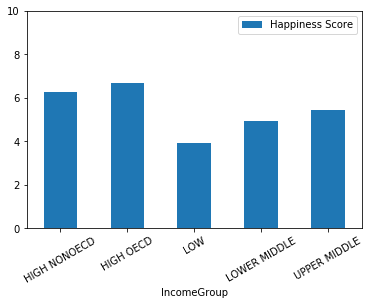

In [112]:
import matplotlib.pyplot as plt
pv_incomes = merged.pivot_table(index='IncomeGroup', values='Happiness Score', aggfunc='mean')
pv_incomes.plot(kind='bar',rot=30,ylim=(0,10))
plt.show()

# 2.4.5 Working With Missing And Duplicate Data

In the Pandas Fundamentals course, we learned that there are various ways to handle missing data:

- Remove any rows that have missing values.
- Remove any columns that have missing values.
- Fill the missing values with some other value.
- Leave the missing values as is.

In this mission, we'll explore each of these options in detail and learn when to use them. We'll work with the 2015, 2016, and 2017 World Happiness Reports again - more specifically, we'll combine them and clean missing values as we start to define a more complete data cleaning workflow. You can find the data sets here, along with descriptions of each of the columns.

In [29]:
happiness2015 = pd.read_csv('wh_2015.csv')
happiness2016 = pd.read_csv('wh_2016.csv')
happiness2017 = pd.read_csv('wh_2017.csv')

In this mission, we'll work with modified versions of the data sets. Each data set has already been updated so that each contains the same countries. For example, if a country appeared in the original 2015 report, but not in the original 2016 report, a row like the one below was added to the 2016 data set:

In [4]:
happiness2016[happiness2016['Country']=='Central African Republic']

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
157,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016


使用[DataFrame.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)属性确认三个df的行数和列数：

In [5]:
happiness2015.shape

(164, 13)

In [6]:
happiness2016.shape 

(164, 14)

In [7]:
happiness2017.shape

(164, 13)

- ### Identifying Missing Values

pandas用`NaN`或`None`表示空值。

However, it's good to note that pandas will not automatically identify values such as `n/a`, `-`, or `--` as `NaN` or `None`, but they may also indicate data is missing. See [here](https://stackoverflow.com/questions/40011531/in-pandas-when-using-read-csv-how-to-assign-a-nan-to-a-value-thats-not-the#answer-40011736) for more information on how to use the `pd.read_csv()` function to read those values in as `NaN`

[Series.isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isnull.html)识别happiness score缺失的行

In [8]:
missing = happiness2015['Happiness Score'].isnull()
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


对于大的数据集，可以用`sum`：

In [9]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [10]:
happiness2016.isnull().sum()

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [11]:
happiness2017.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

- ### Correcting Data Cleaning Errors that Result in Missing Values

最好在 *数据转换前* 检查缺失值，这样在如果在数据转换后引入了缺失值，我们可以知道到底是真的缺失还是由于转换操作导致的缺失。

As we progress through this mission, we'll use the following workflow to clean our missing values, starting with checking for errors:

1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. Drop row/column.
4. Fill missing values with reasonable estimates computed from the available data.

Combine the 2015, 2016, and 2017 World Happiness Reports:

In [112]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
combined.isnull().sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Country                          0
Dystopia Residual               22
Economy Gdp Per Capita          22
Family                          22
Freedom                         22
Generosity                      22
Happiness Rank                  22
Happiness Score                 22
Health Life Expectancy          22
Lower Confidence Interval      335
Region                         177
Standard Error                 334
Trust Government Corruption     22
Upper Confidence Interval      335
Whisker High                   337
Whisker Low                    337
Year                             0
dtype: int64

We can see above that our dataframe has many missing values and these missing values follow a pattern. Most columns fall into one of the following categories:

177 missing values (about 1/3 of the total values)   
337 missing values (about 2/3 of the total values)

#### 从以上结果可以发现有些相同的内容有不同的列名，如   
`Trust (Government Corruption)   
 Trust..Government.Corruption.`
 
可以使用`str.replace()`更新列名：

In [113]:
df = pd.DataFrame({'(A)':[1,2,3],
                   '(B)':[4,5,6],
                   'C)':[7,8,9]})

print (df)

   (A)  (B)  C)
0    1    4   7
1    2    5   8
2    3    6   9


In [114]:
# 把列名中的 () 替换为 _
df.columns = df.columns.str.replace(r"[()]", "_")
print (df)

   _A_  _B_  C_
0    1    4   7
1    2    5   8
2    3    6   9


接下来更新列名，并重新组合DataFrame:

In [115]:
happiness2015.columns = happiness2015.columns.str.replace(r'[()]','').str.strip().str.title()
happiness2016.columns = happiness2016.columns.str.replace(r'[()]','').str.strip().str.title()
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.title()

combined = pd.concat([happiness2015,happiness2016,happiness2017], ignore_index=True)

combined.isnull().sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


Country                          0
Dystopia Residual               22
Economy Gdp Per Capita          22
Family                          22
Freedom                         22
Generosity                      22
Happiness Rank                  22
Happiness Score                 22
Health Life Expectancy          22
Lower Confidence Interval      335
Region                         177
Standard Error                 334
Trust Government Corruption     22
Upper Confidence Interval      335
Whisker High                   337
Whisker Low                    337
Year                             0
dtype: int64

- ### Visualizing Missing Data

通过绘制热图[heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)更好地观察缺失值

通过`seaborn`绘制热图，首先把index设为`Year`以便观察

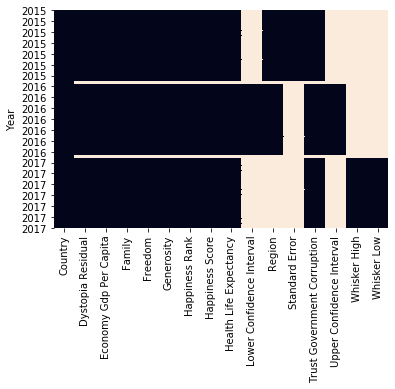

In [116]:
import seaborn as sns
combined_updated = combined.set_index('Year')
sns.heatmap(combined_updated.isnull(), cbar=False)

图中黑色表示无缺失，粉色表示缺失

We can make the following observations:

- No values are missing in the `COUNTRY` column.
- There are some rows in the 2015, 2016, and 2017 data with missing values in all columns EXCEPT the `COUNTRY` column.
- Some columns only have data populated for one year.
- It looks like the `REGION` data is missing for the year `2017`.

验证2017数据的`Region`是缺失的，注意2017数据有164行

In [117]:
regions_2017 = combined.loc[combined['Year']==2017,'Region']
regions_2017.isnull().sum()

164

- ###  Using Data From Additional Sources to Fill in Missing Values

Recall once more that each year contains the same countries. Since the regions are fixed values - the region a country was assigned to in 2015 or 2016 won't change - we should be able to assign the 2015 or 2016 region to the 2017 row.

删除重复项[df.drop_duplocates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

In [118]:
regions = combined[['Country','Region']].drop_duplicates().dropna()

In [119]:
regions

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
215,Belize,Latin America and Caribbean
239,Somalia,Sub-Saharan Africa
260,Somaliland Region,Sub-Saharan Africa
276,Namibia,Sub-Saharan Africa


In [120]:
combined = pd.merge(left=combined, right=regions, how='left', on='Country')
combined = combined.drop('Region_x', axis=1)
combined.isnull().sum()

Country                          0
Dystopia Residual               22
Economy Gdp Per Capita          22
Family                          22
Freedom                         22
Generosity                      22
Happiness Rank                  22
Happiness Score                 22
Health Life Expectancy          22
Lower Confidence Interval      335
Standard Error                 334
Trust Government Corruption     22
Upper Confidence Interval      335
Whisker High                   337
Whisker Low                    337
Year                             0
Region_y                         0
dtype: int64

- ### Identifying Duplicates Values

We'll use the [DataFrame.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) method to check for duplicate values. If no parameters are specified, the method will check for any rows in which **all** columns have the same values.

In [121]:
combined['Country'] = combined['Country'].str.upper() # 确保检查时不会因为大小写导致遗漏重复项
dups = combined.duplicated(['Country', 'Year'])
combined[dups]

,Country,Dystopia Residual,Economy Gdp Per Capita,Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health Life Expectancy,Lower Confidence Interval,Standard Error,Trust Government Corruption,Upper Confidence Interval,Whisker High,Whisker Low,Year,Region_y
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


Since the dataframe is empty, we can tell that there are no rows with exactly the same country AND year.

- ### Correcting Duplicates Values

In [122]:
combined[combined['Country'] == 'SOMALILAND REGION']

,Country,Dystopia Residual,Economy Gdp Per Capita,Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health Life Expectancy,Lower Confidence Interval,Standard Error,Trust Government Corruption,Upper Confidence Interval,Whisker High,Whisker Low,Year,Region_y
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,NaN,0.06161,0.39928,NaN,NaN,NaN,2015,Sub-Saharan Africa
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97.0,5.057,0.33108,4.934,NaN,0.36794,5.18,NaN,NaN,2016,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


Now, we can see that there are two rows for 2015, 2016, and 2017 each

In [123]:
combined = combined.drop_duplicates(['Country','Year'])

- ### Handle Missing Values by Dropping Columns

pandas里的大多数方法都可以处理带有缺失值的数据，因此不需要再移除它们。

但是保留缺失值引起其他问题，改变数据集的分布。

并且机器学习的算法也无法处理带缺失值的数据，因此必须知道如何处理它们。

Next, we'll consider dropping columns with missing data:

1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. **Drop row/column.**
4. Fill missing values with reasonable estimates computed from the available data.

In [124]:
combined.isnull().sum()

Country                          0
Dystopia Residual               19
Economy Gdp Per Capita          19
Family                          19
Freedom                         19
Generosity                      19
Happiness Rank                  19
Happiness Score                 19
Health Life Expectancy          19
Lower Confidence Interval      332
Standard Error                 331
Trust Government Corruption     19
Upper Confidence Interval      332
Whisker High                   334
Whisker Low                    334
Year                             0
Region_y                         0
dtype: int64

When deciding if you should drop a row or column, carefully consider whether you'll lose information that could alter your analysis. Instead of just saying, "If x percentage of the data is missing, we'll drop it.", it's better to also ask the following questions:

1. Is the missing data needed to accomplish our end goal?
2. How will removing or replacing the missing values affect our analysis?

To answer the first question, let's establish our end goal:

- End Goal: We want to analyze happiness scores and the factors that contribute to happiness scores by year and region.

Since missing values make up more than half of the following columns and we don't need them to accomplish our end goal, we'll drop them:

- `STANDARD ERROR`
- `LOWER CONFIDENCE INTERVAL`
- `UPPER CONFIDENCE INTERVAL`
- `WHISKER HIGH`
- `WHISKER LOW`

[DataFrame.notnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html)返回非空值

In [125]:
combined.notnull().sum().sort_values()

Whisker Low                    155
Whisker High                   155
Lower Confidence Interval      157
Upper Confidence Interval      157
Standard Error                 158
Health Life Expectancy         470
Dystopia Residual              470
Economy Gdp Per Capita         470
Family                         470
Freedom                        470
Generosity                     470
Happiness Rank                 470
Happiness Score                470
Trust Government Corruption    470
Country                        489
Year                           489
Region_y                       489
dtype: int64

[df.drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [126]:
columns_to_drop = ['Lower Confidence Interval', 'Standard Error', 'Upper Confidence Interval', 
                   'Whisker High', 'Whisker Low']
combined.drop(columns_to_drop, axis=1, inplace = True)
combined.isnull().sum()

Country                         0
Dystopia Residual              19
Economy Gdp Per Capita         19
Family                         19
Freedom                        19
Generosity                     19
Happiness Rank                 19
Happiness Score                19
Health Life Expectancy         19
Trust Government Corruption    19
Year                            0
Region_y                        0
dtype: int64

However, as you start working with bigger datasets, it can sometimes be tedious to create a long list of column names to drop. Instead we can use the [DataFrame.dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method to complete the same task.

By default, the `dropna()` method will drop rows with any missing values. To drop columns, we can set the `axis` parameter equal to `1`, just like with the `df.drop()` method:

`df.dropna(axis=1)`

However, this would result in dropping columns with any missing values - we only want to drop certain columns. Instead, we can also use the `thresh` parameter to only drop columns if they contain below a certain number of *non-null* values.

使用`combined = combined.dropna(thresh=159, axis=1)`可以达到以上使用`drop()`一样的效果

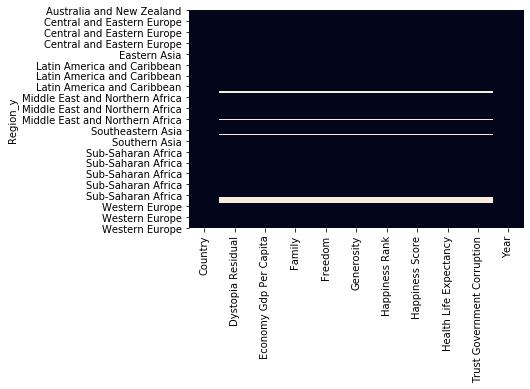

In [132]:
sorted = combined.set_index('Region_y').sort_values(['Region_y', 'Happiness Score'])
sns.heatmap(sorted.isnull(), cbar=False)

- ###  Handling Missing Values with Imputation

以上可以得知
1. Only about 4 percent of the values in each column are missing.
2. Dropping rows with missing values won't cause us to lose information in other columns.

As a result, it may be best to drop the remaining missing values.

However, before we make a decision, let's consider handling the missing values by replacing them with estimated values, also called imputation.

1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. Drop row/column.
4. **Fill missing values with reasonable estimates computed from the available data.**

use the [Series.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html) method to replace the missing values with the mean.

In [134]:
happiness_mean = combined['Happiness Score'].mean()
print(happiness_mean)
combined['Happiness Score UPDATED'] = combined['Happiness Score'].fillna(happiness_mean)
print(combined['Happiness Score UPDATED'].mean())

5.370727659882893
5.370727659882894


回想一下，当我们可视化缺失的数据时，我们确定撒哈拉以南非洲地区包含的缺失值最多。 由于我们想按区域分析数据，因此让我们更仔细地研究每个区域的均值：

In [137]:
combined.pivot_table(index='Region_y', values='Happiness Score', margins=True)

,Happiness Score
Region_y,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


Also, if we think about the reasons why a country may not have participated in the happiness survey - war, natural disaster, etc - many of them would likely result in a lower happiness score than even the region's mean. We'll conclude that the mean for the whole world wouldn't be a good estimate for them.